In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import chi2
import gzip
from tqdm.notebook import trange, tqdm
import glob

In [4]:
data = pd.read_parquet('data2019.parquet')
syn_data = pd.read_parquet('syn_data2019.parquet')

In [5]:
STD_200_FLIPS = math.sqrt(200)/2
VIS_SAMPLING = 1000

In [6]:
def calculate_z_score(data):
    return (data-100)/STD_200_FLIPS.sum(axis=1)

In [7]:
def visualize(data,ax=None):
    data_np = data.iloc[:,3:].to_numpy()
    data_np_na = np.isnan(data_np).sum(axis=1)

    cols = np.sqrt(data.shape[1] - 3 - data_np_na)
    z_norm=np.nansum((data_np-100)/STD_200_FLIPS, axis=1)/cols
    del data_np
    
    sampling = list(range(0,len(z_norm),VIS_SAMPLING))
    
    chi_exp_sq = np.array([stats.chi2.ppf(0.95, df=i+1)-i for i in sampling])
    plt.plot(sampling, (np.cumsum(z_norm**2)-np.arange(0,len(z_norm)))[sampling])
    plt.plot(sampling, chi_exp_sq)


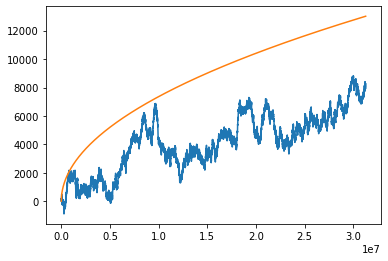

In [8]:
visualize(data)

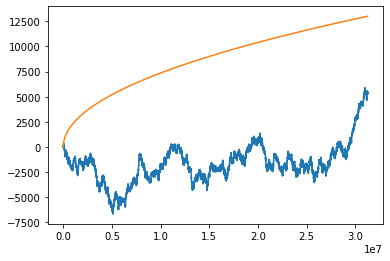

In [9]:
visualize(syn_data)

In [10]:
np.nanmean(data.iloc[:,3:])

100.00015874137297

In [11]:
np.nanmean(syn_data.iloc[:,3:])

99.99988179499364

In [13]:
data = pd.read_parquet('../data2014.parquet')

In [14]:
data.head()

,rowtype,timestamp,HRtimestamp,1,37,108,110,111,112,116,...,2083,2173,2178,2221,2225,2232,2250,3101,3106,3247
0,13,1388534400,NaN,104.0,103.0,88.0,112.0,98.0,95,102.0,...,99.0,NaN,106.0,103.0,96.0,94.0,86.0,102.0,NaN,99.0
1,13,1388534401,NaN,89.0,100.0,91.0,92.0,108.0,109,104.0,...,90.0,NaN,97.0,105.0,106.0,101.0,102.0,95.0,NaN,94.0
2,13,1388534402,NaN,108.0,107.0,108.0,93.0,104.0,105,84.0,...,98.0,NaN,99.0,106.0,100.0,104.0,95.0,94.0,NaN,105.0
3,13,1388534403,NaN,99.0,86.0,95.0,86.0,88.0,107,98.0,...,106.0,NaN,98.0,92.0,92.0,92.0,87.0,100.0,NaN,95.0
4,13,1388534404,NaN,101.0,102.0,106.0,101.0,97.0,100,107.0,...,105.0,NaN,106.0,107.0,109.0,93.0,100.0,102.0,NaN,112.0


In [15]:
corr = data.iloc[:,3:].corr()

<AxesSubplot:>

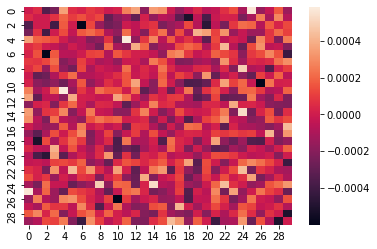

In [21]:
import seaborn as sns
corr = np.where(corr==1,0,corr)
sns.heatmap(corr)

In [20]:
np.where(corr==1,0,corr)

array([[ 0.00000000e+00,  5.10147438e-05, -3.44681447e-04,
        -2.41939376e-04,  3.55831096e-04,  5.82958615e-05,
         2.70709500e-05,  8.97232152e-05,  5.79875222e-05,
        -8.71349979e-06,  1.87584965e-05,  2.68540180e-04,
         3.67173053e-04, -1.80499948e-04,  3.43284352e-04,
         3.09473821e-04, -8.89530158e-06, -1.59779858e-04,
        -4.98456835e-05,  3.80672227e-05, -6.42437317e-05,
        -3.41781344e-05,  6.66596464e-05,  1.41712554e-04,
        -1.07692763e-04,  5.63975445e-04, -1.48110938e-04,
        -3.66250055e-05,  1.68396168e-04, -1.40373259e-04],
       [ 5.10147438e-05,  0.00000000e+00, -4.32037845e-06,
         6.97709456e-05,  1.89285249e-04,  9.93980773e-05,
         1.51312163e-04,  8.07924872e-05,  1.26372379e-04,
        -2.96946164e-04, -1.84095213e-04, -1.15306148e-04,
        -2.98683224e-04,  1.73033017e-05, -1.66808820e-04,
        -6.17275200e-05, -9.10240140e-05, -3.14385771e-04,
        -5.14761102e-04, -4.83939468e-05, -3.69768291e-